In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
mat = sio.loadmat('ex6data3.mat')
X,y = mat['X'],mat['y']
Xval,yval = mat['Xval'],mat['yval']

In [3]:
def plot_data():
    plt.scatter(X[:,0],X[:,1],c = y.flatten(),cmap = 'jet')
    plt.xlabel('x1')
    plt.ylabel('x2')

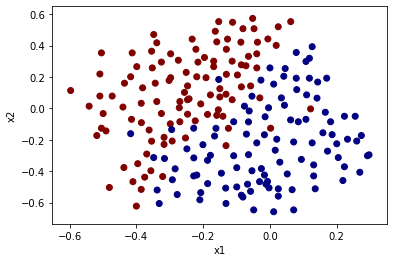

In [4]:
plot_data()

In [5]:
Cvalues = [0.01,0.03,0.1,0.3,1,3,10,30,100]
gammas = [0.01,0.03,0.1,0.3,1,3,10,30,100]

In [6]:
best_score = 0
best_parameters = (0,0)

for c in Cvalues:
    for gamma in gammas:
        svc = SVC(C = c,kernel = 'rbf', gamma = gamma)
        svc.fit(X,y.flatten())
        score = svc.score(Xval,yval.flatten())
        if score > best_score:
            best_score = score
            best_parameters = (c,gamma)
print(best_score,best_parameters)
    

0.965 (0.3, 100)


In [7]:
svc2 = SVC(C = 0.3,kernel = 'rbf',gamma= 100)
svc2.fit(X,y.flatten())

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

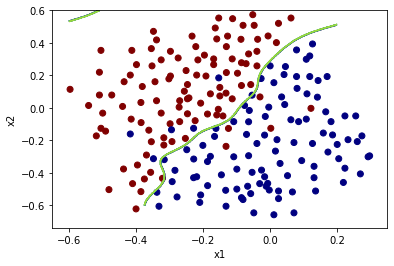

In [8]:
def plot_boundary(model):  #绘制决策边界
    x_min,x_max = -0.6,0.2
    y_min,y_max = -0.6,0.6
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))
    z = model.predict(np.c_[xx.flatten(),yy.flatten()])
    zz = z.reshape(xx.shape)
    plt.contour(xx,yy,zz)

plot_boundary(svc2)
plot_data()